In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.shape

(614, 13)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


*There are 614 records in which Gender, Marital Status, Dependents, Self Employed, Loan Amount, Loan Amount Term, Credi History have missing values.*
<br><br>

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP002940,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [7]:
num_cols = train.dtypes[train.dtypes != 'object']
cat_cols = train.dtypes[train.dtypes == 'object']
print('Number of Numerical columns are',len(num_cols.index),'Number of Catergorical columns are',len(cat_cols.index))

Number of Numerical columns are 5 Number of Catergorical columns are 8


In [8]:
for col in cat_cols.index:
    print(train[col].value_counts())

LP002940    1
LP002842    1
LP001669    1
LP002211    1
LP002603    1
           ..
LP002161    1
LP001027    1
LP002931    1
LP001811    1
LP001907    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [9]:
UniqueIds = len(set(train.Loan_ID))
TotalIds  = train.shape[0]
DuplIds   = TotalIds - UniqueIds
print("There are " + str(DuplIds) + " duplicate IDs for " + str(TotalIds) + " total entries")

There are 0 duplicate IDs for 614 total entries


In [10]:
num_cols

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [11]:
cat_cols

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [12]:
pd.DataFrame(round(train.isnull().sum()/len(train)*100,2),columns=['Missing Percentage'])

,Missing Percentage
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


# Missing Value Imputation

In [13]:
pd.crosstab(train['Married'], (train['CoapplicantIncome']==0))

CoapplicantIncome,False,True
Married,,
No,70,143
Yes,270,128


*The variable Married is imputed based on Coappilant Income. it is assumed that the Applicant and Coapplicant relationship is husband and wife. From the crosstable above it we can find that unmarried applicants tend to not have coapplicant income and vice versa.*

In [14]:
train.loc[(train['Married'].isnull()) & (train['CoapplicantIncome']==0), 'Married'] = 'No'
train.loc[(train['Married'].isnull()), 'Married'] = 'Yes'

In [15]:
pd.crosstab(train['Gender'], (train['Married']=='Yes') & (train['ApplicantIncome']>train['CoapplicantIncome']),colnames=['Condition'])

Condition,False,True
Gender,,
Female,86,26
Male,180,309


*It can be that found that if the applicant is Married and the Income is greater than the Coapplicant, then the gender will be male.*
<br><br>

In [16]:
subset = ((train['Gender'].isnull()) & (train['Married']=='Yes') & (train['ApplicantIncome']>train['CoapplicantIncome']))
train.loc[subset, 'Gender'] = 'Male'
train.loc[train['Gender'].isnull(),'Gender'] = 'Female'

*Other variables are imputed using mean and mode imputation.*

In [17]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train["LoanAmount"] = train["LoanAmount"].fillna(train["LoanAmount"].median())
train["Loan_Amount_Term"] = train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

In [18]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Preprocessing

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
train['Dependents'] = train['Dependents'].str.strip('+')

In [21]:
train['Dependents'] = train['Dependents'].astype('int64')

In [22]:
train["Gender"] = train["Gender"].replace(["Female","Male"], [0, 1])
train["Married"] = train["Married"].replace(["No","Yes"], [0, 1])
train["Education"] = train["Education"].replace(["Not Graduate","Graduate"], [0, 1])
train["Self_Employed"] = train["Self_Employed"].replace(["No","Yes"], [0, 1])
train["Property_Area"] = train["Property_Area"].replace(["Rural","Semiurban", "Urban"], [0, 1, 2])
train["Loan_Status"] = train["Loan_Status"].replace(["N","Y"], [0, 1])

In [23]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

## Univarient Analysis

### `Distribution of Income of Applicants`

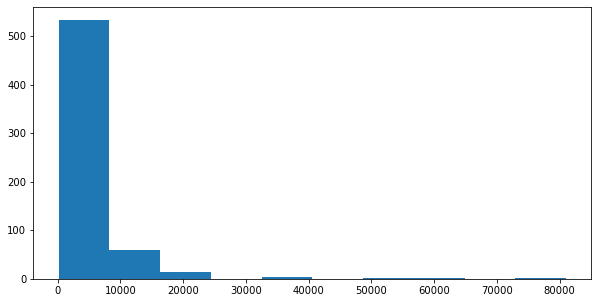

In [24]:
plt.figure(figsize=(10,5))
plt.hist(train['ApplicantIncome']);

*Most of the applicants have their Income in between \\$150 and \\$17,000. Hence,The Data is left skewed.*
<br><br>

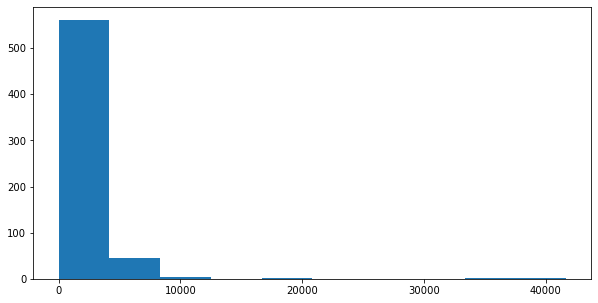

In [25]:
plt.figure(figsize=(10,5))
plt.hist(train['CoapplicantIncome']);  

*Most of the co-applicants have their Income in between \\$0 and \\$8,000. Hence,The Data is left skewed.*
<br><br>

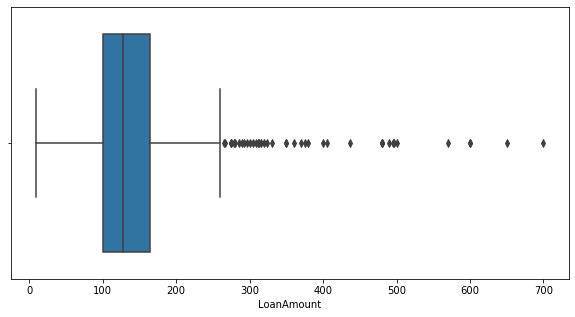

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(train['LoanAmount'])

*Most of the applicats have availed loan are around \\$100 to <\\$200 and and a few applicants havs availed \\$700 which is an outlier.*
<br><br>

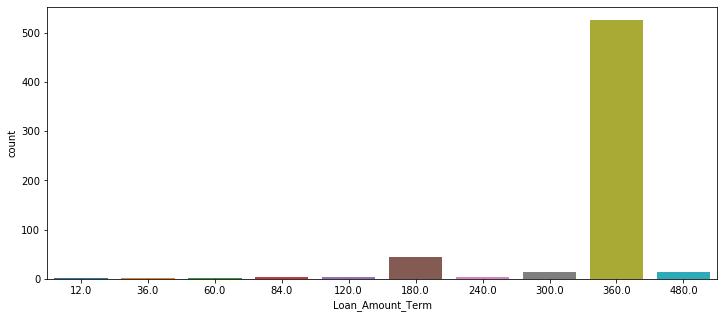

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(train['Loan_Amount_Term'])

*Most of the applicants have taken loan term of 360.*
<br><br>

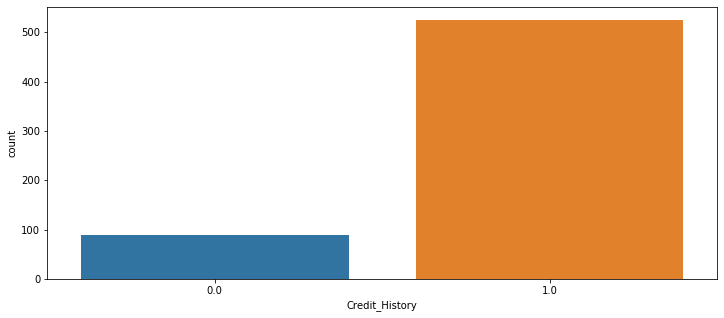

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(train['Credit_History'])

### Bivarient Analysis

In [29]:
train.groupby(['Credit_History'])['Loan_ID'].count()

Credit_History
0.0     89
1.0    525
Name: Loan_ID, dtype: int64

*Most of the customers who have availed loans were already having credit history.*
<br><br>

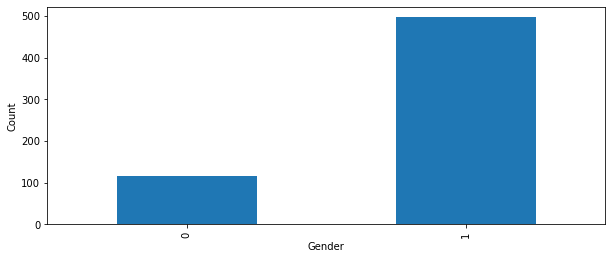

In [30]:
plt.figure(figsize=(10,4))
train.groupby(['Gender'])['Loan_ID'].count().plot(kind='bar')
plt.ylabel('Count')
plt.show()

*Most of the customers who have availed loans are male.*
<br><br>

### `Loan Status by Marital Status`

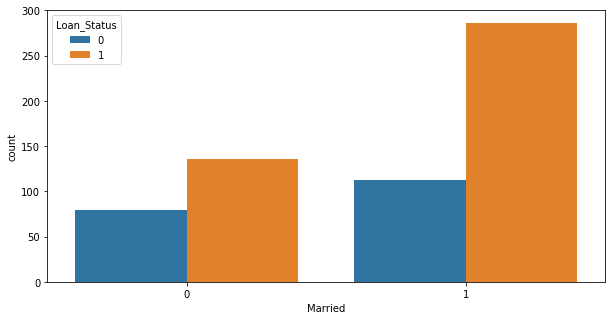

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=train["Married"], hue = train["Loan_Status"], data = train)

*Mostly half of the Unmarried Applicant have no not be considered to be given a loan*
<br><br>

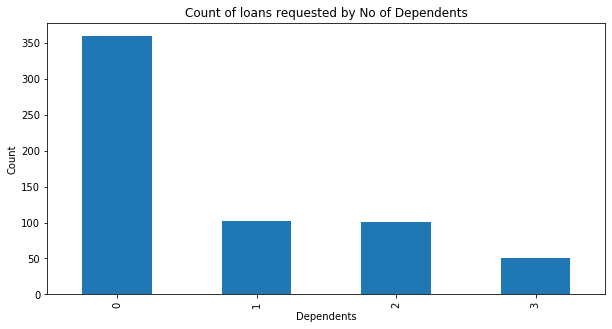

In [32]:
plt.figure(figsize=(10,5))
fig = train.groupby("Dependents")["Loan_Status"].count().plot.bar()
fig.set_ylabel('Count')
fig.set_title("Count of loans requested by No of Dependents");

*Most of the applicant to whom were in need of loan had no dependents (i.e. had no commitments)*
<br><br>

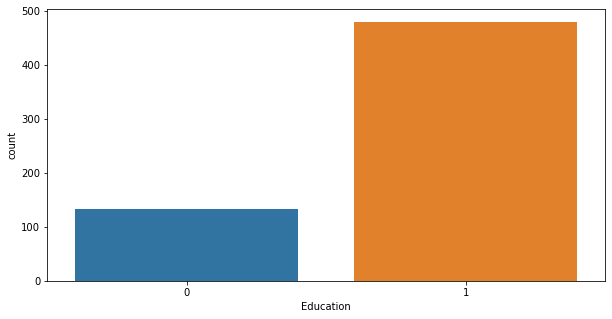

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(train['Education'])

*Most of the applicant who were availing loans are Graduates*
<br><br>

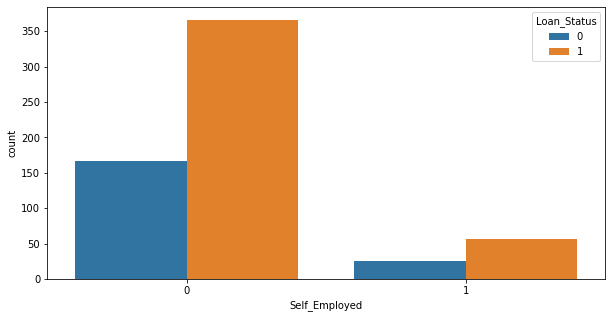

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Self_Employed'],hue=train['Loan_Status'],data=train)

*Very less Self Employed Applicant where availed Loans.*
<br><br>

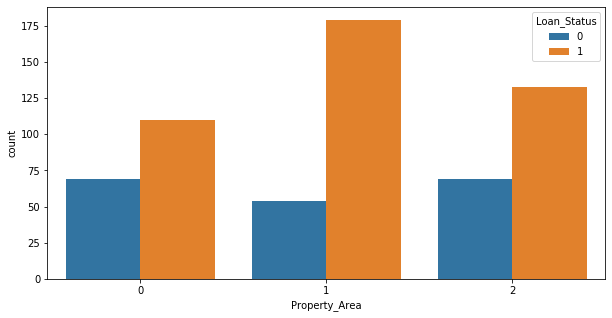

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Property_Area'],hue=train['Loan_Status'],data=train)

*Applicant who had Semiurban property area were approved the most for Loans.*
<br><br>

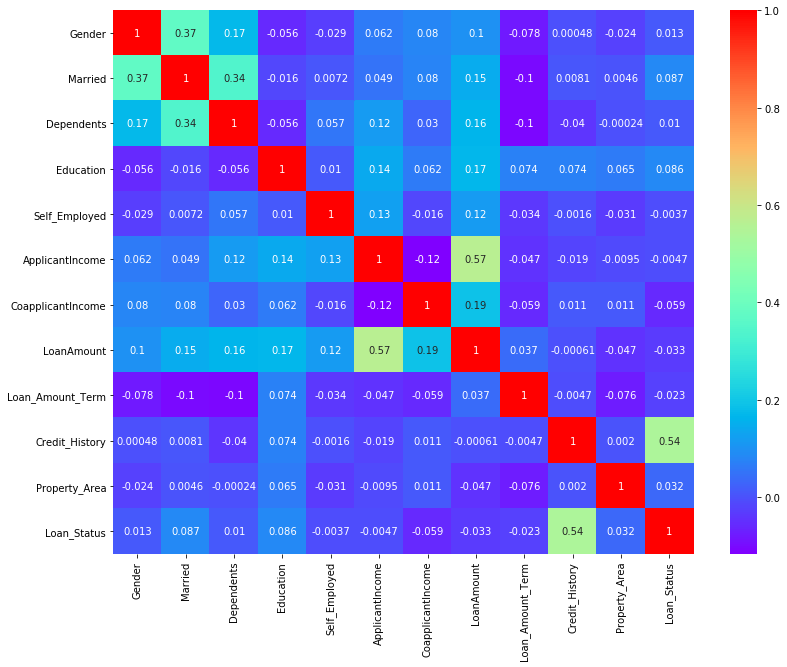

In [36]:
plt.figure(figsize=(13,10))
sns.heatmap(train.corr(),annot=True,cmap='rainbow')

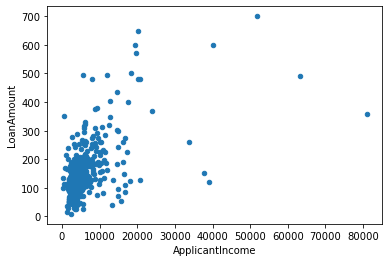

In [37]:
train.plot.scatter("ApplicantIncome", "LoanAmount")

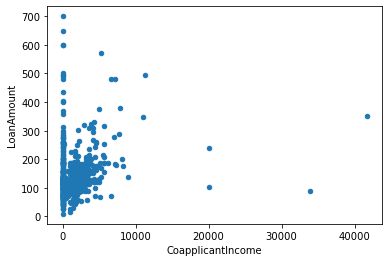

In [38]:
train.plot.scatter("CoapplicantIncome", "LoanAmount")

*We can Infere that there's a correlation between the Loan Amount and the income of both the Applicant and Coapplicant.*
<br><br>

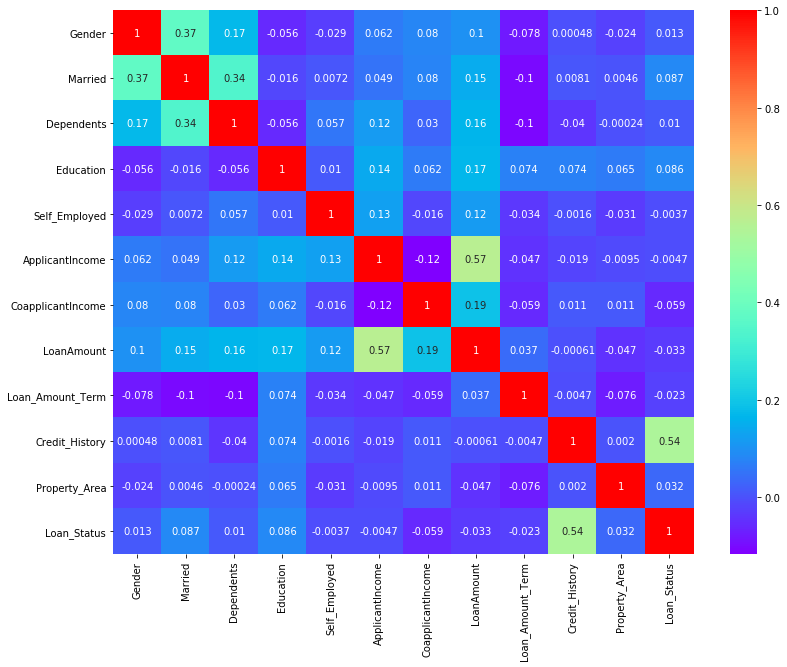

In [39]:
fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(train.corr(),annot = True, ax=ax,cmap='rainbow')

*From the correlation matrix, we can see that Credit_History has the highest correlation with the Loan_Status which makes sense as your credit history should determine to a large extent if you can access a loan or not.*
<br><br>

# Feature Engineering

In [40]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
train['Loan/Term']=train['LoanAmount']/train['Loan_Amount_Term']
train['RepaymentRatio']=(train['Loan/Term']*1000)/train['TotalIncome']

In [41]:
train['TotalIncome'] = np.log(train['TotalIncome'])

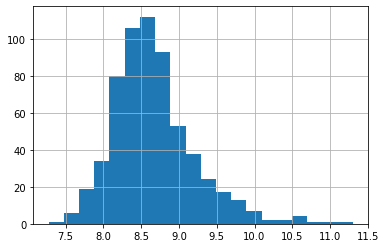

In [42]:
train['TotalIncome'].hist(bins=20);

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan/Term,RepaymentRatio
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,8.674026,0.355556,0.060789
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,8.714568,0.355556,0.058374
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,8.006368,0.183333,0.061111
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,8.505323,0.333333,0.067463
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,8.699515,0.391667,0.065278


In [44]:
train_fe = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [45]:
train_fe.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Loan/Term', 'RepaymentRatio'],
      dtype='object')

In [46]:
train_fe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan/Term,RepaymentRatio
0,LP001002,1,0,0,1,0,1.0,2,1,8.674026,0.355556,0.060789
1,LP001003,1,1,1,1,0,1.0,0,0,8.714568,0.355556,0.058374
2,LP001005,1,1,0,1,1,1.0,2,1,8.006368,0.183333,0.061111
3,LP001006,1,1,0,0,0,1.0,2,1,8.505323,0.333333,0.067463
4,LP001008,1,0,0,1,0,1.0,2,1,8.699515,0.391667,0.065278


# Classification Algorithm

In [47]:
X=train_fe.drop(['Loan_Status','Loan_ID'],axis=1)
y=train_fe[['Loan_Status']]

In [48]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [49]:
Scaled_X = pd.DataFrame(SC.fit_transform(X),columns=X.columns)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [51]:
# Scaled_X.head()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [53]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [54]:
y_pred_LR = LR.predict(X_test)

In [55]:
print('The accuracy of the Train is',LR.score(X_train,y_train))
print('The accuracy of the Test is',accuracy_score(y_test,y_pred_LR))

The accuracy of the Train is 0.8251748251748252
The accuracy of the Test is 0.7837837837837838


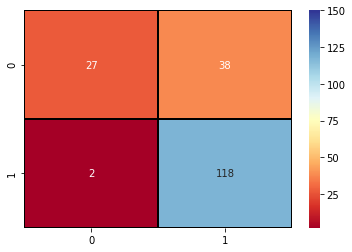

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred_LR),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True,vmax = 150,fmt='d');

In [58]:
print('The Recall Score is:',recall_score(y_test,y_pred_LR))

The Recall Score is: 0.9833333333333333


In [59]:
print('The F1-Score Score is:',f1_score(y_test,y_pred_LR))

The F1-Score Score is: 0.8550724637681159


### Gradient Boosting

In [60]:
GB = GradientBoostingClassifier(learning_rate=0.5,random_state=1)

In [61]:
GB.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(learning_rate=0.5, random_state=1)

In [62]:
y_pred_GB = GB.predict(X_test)

In [63]:
len(y_pred_GB)

185

In [64]:
print('The accuracy of the Train is',GB.score(X_train,y_train))
print('The accuracy of the Test is',accuracy_score(y_test,y_pred_GB))

The accuracy of the Train is 1.0
The accuracy of the Test is 0.7567567567567568


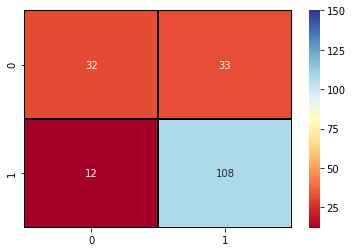

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred_GB),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True,vmax = 150,fmt='d');

In [66]:
print('The Recall Score is:',recall_score(y_test,y_pred_GB))

The Recall Score is: 0.9


In [67]:
print('The F1-Score Score is:',f1_score(y_test,y_pred_GB))

The F1-Score Score is: 0.8275862068965516


### Random Forest

In [68]:
RF = RandomForestClassifier()

In [69]:
RF.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [70]:
y_pred_RF = RF.predict(X_test)

In [71]:
len(y_pred_RF)

185

In [72]:
print('The accuracy of the Train is',RF.score(X_train,y_train))
print('The accuracy of the Test is',accuracy_score(y_test,y_pred_RF))

The accuracy of the Train is 1.0
The accuracy of the Test is 0.7783783783783784


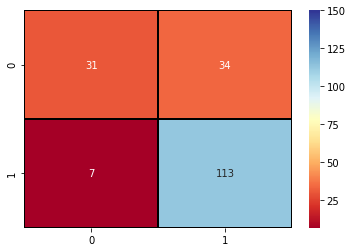

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred_RF),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True,vmax = 150,fmt='d');

In [74]:
print('The Recall Score is:',recall_score(y_test,y_pred_RF))

The Recall Score is: 0.9416666666666667


In [75]:
print('The F1-Score Score is:',f1_score(y_test,y_pred_RF))

The F1-Score Score is: 0.846441947565543


### Naive Baye's

In [77]:
NB = GaussianNB()

In [78]:
NB.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [79]:
y_pred_NB = NB.predict(X_test)

In [80]:
len(y_pred_NB)

185

In [81]:
print('The accuracy of the Train is',NB.score(X_train,y_train))
print('The accuracy of the Test is',accuracy_score(y_test,y_pred_NB))

The accuracy of the Train is 0.8228438228438228
The accuracy of the Test is 0.7783783783783784


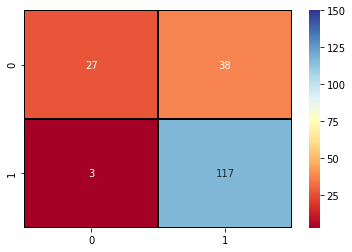

In [82]:
sns.heatmap(confusion_matrix(y_test,y_pred_NB),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True,vmax = 150,fmt='d');

In [83]:
print('The Recall Score is:',recall_score(y_test,y_pred_NB))

The Recall Score is: 0.975


In [84]:
print('The F1-Score Score is:',f1_score(y_test,y_pred_NB))

The F1-Score Score is: 0.8509090909090908


### K Nearest Neighbors

In [85]:
KNN = KNeighborsClassifier()

In [86]:
KNN.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [87]:
y_pred_KNN = KNN.predict(X_test)

In [88]:
len(y_pred_KNN)

185

In [89]:
print('The accuracy of the Train is',KNN.score(X_train,y_train))
print('The accuracy of the Test is',accuracy_score(y_test,y_pred_KNN))

The accuracy of the Train is 0.8321678321678322
The accuracy of the Test is 0.7513513513513513


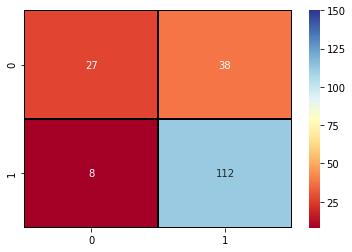

In [90]:
sns.heatmap(confusion_matrix(y_test,y_pred_KNN),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True,vmax = 150,fmt='d');

In [91]:
print('The Recall Score is:',recall_score(y_test,y_pred_KNN))

The Recall Score is: 0.9333333333333333


In [92]:
print('The F1-Score Score is:',f1_score(y_test,y_pred_KNN))

The F1-Score Score is: 0.8296296296296296


### Bagging Classifier

In [93]:
Bag=BaggingClassifier(base_estimator=LR)

In [94]:
Bag.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=LogisticRegression())

In [95]:
y_pred_Bag = Bag.predict(X_test)

In [96]:
len(y_pred_Bag)

185

In [97]:
print('The accuracy of the Train is',Bag.score(X_train,y_train))
print('The accuracy of the Test is',accuracy_score(y_test,y_pred_Bag))

The accuracy of the Train is 0.8251748251748252
The accuracy of the Test is 0.7837837837837838


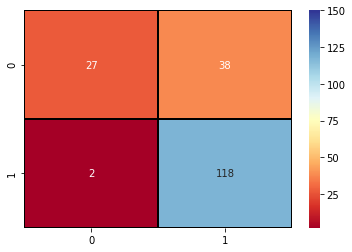

In [98]:
sns.heatmap(confusion_matrix(y_test,y_pred_Bag),
            cmap='RdYlBu',linewidths=1,linecolor='k',
            annot=True,vmax = 150,fmt='d');

In [99]:
print('The Recall Score is:',recall_score(y_test,y_pred_Bag))

The Recall Score is: 0.9833333333333333


In [100]:
print('The F1-Score Score is:',f1_score(y_test,y_pred_Bag))

The F1-Score Score is: 0.8550724637681159


<br><br><br><br><br><br><br><br>

## Modeling On Unseen Data:

In [101]:
test = pd.read_csv('Test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [102]:
test.shape

(367, 12)

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [104]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [105]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP001499,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367,NaN,NaN,NaN,4805.6,4910.69,0,2864,3786,5060,72529
CoapplicantIncome,367,NaN,NaN,NaN,1569.58,2334.23,0,0,1025,2430.5,24000
LoanAmount,362,NaN,NaN,NaN,136.133,61.3667,28,100.25,125,158,550
Loan_Amount_Term,361,NaN,NaN,NaN,342.537,65.1566,6,360,360,360,480


In [106]:
num_cols = test.dtypes[test.dtypes != 'object']
cat_cols = test.dtypes[test.dtypes == 'object']
print('Number of Numerical columns are',len(num_cols.index),'Number of Catergorical columns are',len(cat_cols.index))

Number of Numerical columns are 5 Number of Catergorical columns are 7


In [107]:
for col in cat_cols.index:
    print(test[col].value_counts())

LP001499    1
LP002375    1
LP001455    1
LP001587    1
LP002782    1
           ..
LP001208    1
LP001842    1
LP002962    1
LP001237    1
LP001221    1
Name: Loan_ID, Length: 367, dtype: int64
Male      286
Female     70
Name: Gender, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
No     307
Yes     37
Name: Self_Employed, dtype: int64
Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64


In [108]:
UniqueIds = len(set(test.Loan_ID))
TotalIds  = test.shape[0]
DuplIds   = TotalIds - UniqueIds
print("There are " + str(DuplIds) + " duplicate IDs for " + str(TotalIds) + " total entries")

There are 0 duplicate IDs for 367 total entries


In [109]:
num_cols

ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [110]:
cat_cols

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
dtype: object

In [111]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [112]:
pd.DataFrame(round(test.isnull().sum()/len(test)*100,2),columns=['Missing Percentage'])

,Missing Percentage
Loan_ID,0.00
Gender,3.00
Married,0.00
Dependents,2.72
Education,0.00
Self_Employed,6.27
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,1.36
Loan_Amount_Term,1.63


# Missing Value Imputation

In [113]:
pd.crosstab(test['Gender'], (test['Married']=='Yes') & (test['ApplicantIncome']>test['CoapplicantIncome']),colnames=['Condition'])

Condition,False,True
Gender,,
Female,50,20
Male,112,174


*It can be that found that if the applicant is Married and the Income is greater than the Coapplicant, then the gender will be male.*
<br><br>

In [114]:
subset = ((test['Gender'].isnull()) & (test['Married']=='Yes') & (test['ApplicantIncome']>test['CoapplicantIncome']))
test.loc[subset, 'Gender'] = 'Male'
test.loc[test['Gender'].isnull(),'Gender'] = 'Female'

*Other variables are imputed using mean and mode imputation.*

In [115]:
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])
test["LoanAmount"] = test["LoanAmount"].fillna(test["LoanAmount"].median())
test["Loan_Amount_Term"] = test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])

In [116]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Data Preprocessing

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [118]:
test['Dependents'] = test['Dependents'].str.strip('+')

In [119]:
test['Dependents'] = test['Dependents'].astype('int64')

In [120]:
test["Gender"] = test["Gender"].replace(["Female","Male"], [0, 1])
test["Married"] = test["Married"].replace(["No","Yes"], [0, 1])
test["Education"] = test["Education"].replace(["Not Graduate","Graduate"], [0, 1])
test["Self_Employed"] = test["Self_Employed"].replace(["No","Yes"], [0, 1])
test["Property_Area"] = test["Property_Area"].replace(["Rural","Semiurban", "Urban"], [0, 1, 2])

In [121]:
test.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

# Feature Engineering

In [122]:
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Loan/Term']=test['LoanAmount']/test['Loan_Amount_Term']
test['RepaymentRatio']=(test['Loan/Term']*1000)/test['TotalIncome']

In [123]:
test['TotalIncome'] = np.log(test['TotalIncome'])

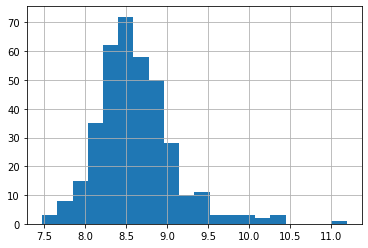

In [124]:
test['TotalIncome'].hist(bins=20);

In [125]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan/Term,RepaymentRatio
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,8.651724,0.305556,0.053419
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,8.428581,0.350000,0.076486
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,8.824678,0.577778,0.084967
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,8.494129,0.277778,0.056852
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,8.094378,0.216667,0.066138


In [126]:
test_fe = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [127]:
test_fe.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'TotalIncome',
       'Loan/Term', 'RepaymentRatio'],
      dtype='object')

In [128]:
test_fe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalIncome,Loan/Term,RepaymentRatio
0,LP001015,1,1,0,1,0,1.0,2,8.651724,0.305556,0.053419
1,LP001022,1,1,1,1,0,1.0,2,8.428581,0.350000,0.076486
2,LP001031,1,1,2,1,0,1.0,2,8.824678,0.577778,0.084967
3,LP001035,1,1,2,1,0,1.0,2,8.494129,0.277778,0.056852
4,LP001051,1,0,0,0,0,1.0,2,8.094378,0.216667,0.066138


In [129]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [130]:
Scaled_test = pd.DataFrame(SC.fit_transform(test_fe.iloc[:,1:]),columns=test_fe.iloc[:,1:].columns)

# Classification Algorithm

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [132]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\Bhuva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [133]:
y_pred_LR = LR.predict(Scaled_test)

In [134]:
y_pred_LR

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [135]:
len(y_pred_LR)

367

In [136]:
Submission = pd.DataFrame(y_pred_LR,columns=['Loan_Status'])
Submission['Loan_ID'] = test['Loan_ID']

In [137]:
Submission['Loan_Status'] = Submission['Loan_Status'].map({1:'Y',0:'N'})

In [138]:
Submission.tail(10)

,Loan_Status,Loan_ID
357,Y,LP002952
358,Y,LP002954
359,Y,LP002962
360,Y,LP002965
361,Y,LP002969
362,Y,LP002971
363,Y,LP002975
364,Y,LP002980
365,Y,LP002986
366,Y,LP002989


In [139]:
Submission.shape

(367, 2)

In [140]:
Submission.isnull().sum()

Loan_Status    0
Loan_ID        0
dtype: int64

In [141]:
Submission.to_csv('Loan_Prediction_Submission.csv',index=False)